In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def calculate_probability(M, V, W):
  """
  Code
  """
  import math
  
  denom=math.sqrt(2*math.pi*V**2)
  numer1=(W-M)*(W-M)/(2*V**2)
  numer=math.exp(-(numer1))
  ans=numer/denom
  return ans

In [ ]:
calculate_probability(42,19.5,46)

0.020032650950827246

In [ ]:
norm.cdf()

In [ ]:
yulu_df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/4.Yulu/Yulu.xlsx')

In [ ]:
yulu_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## 1.Problem statement

**Yulu is facing dip in their revenues and there are many factors affecting their revenues. We have to find out which factors influences the demand and which factors actually decreases the demand so that yulu can plan the supply or availability of shared electric cycles and can increase their revenues or profits**

###a. Shape of data,data types,statistical summary

In [ ]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
yulu_df.shape

(10886, 12)

There were a total of 10886 instances and 12 features. Out of 12 features 9 are independent features and 3 are dependent features and count is the sum of both casual and registered users

In [ ]:
print('The Unique values are:')
for col in yulu_df.columns:
  print(f" {col} - '{(yulu_df[col].nunique())}'")

The Unique values are:
 datetime - '10886'
 season - '4'
 holiday - '2'
 workingday - '2'
 weather - '4'
 temp - '49'
 atemp - '60'
 humidity - '89'
 windspeed - '28'
 casual - '309'
 registered - '731'
 count - '822'


In [ ]:
categorical_columns=['season','holiday','workingday','weather']
for i in categorical_columns:
  yulu_df[i]=yulu_df[i].astype('category')

In [ ]:
yulu_df[categorical_columns]

,season,holiday,workingday,weather
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
10881,4,0,1,1
10882,4,0,1,1
10883,4,0,1,1
10884,4,0,1,1


In [ ]:
for i in yulu_df[categorical_columns]:
  print(yulu_df[i].value_counts())
  print('_____________')

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
_____________
0    10575
1      311
Name: holiday, dtype: int64
_____________
1    7412
0    3474
Name: workingday, dtype: int64
_____________
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
_____________


In [ ]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
yulu_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**There are no null values**

In [ ]:
yulu_df[yulu_df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


**There were no duplictaes**

In [ ]:
yulu_df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


###b. Univariate analysis

In [ ]:
yulu_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
import seaborn as sns

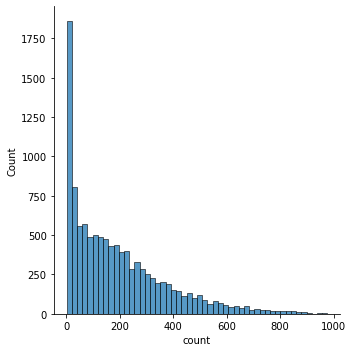

In [ ]:
sns.displot(yulu_df['count'],bins=50)

**In overall the peak majorly at 0-20 i.e the total rental bikes on a perticular time is more of 0-20 range.**

Lets check the conditions and time when the bike rentals are more than 500

In [ ]:
yulu_df[yulu_df['count']>=500]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1819,2011-05-02 17:00:00,2,0,1,1,27.06,31.060,65,12.9980,65,472,537
1820,2011-05-02 18:00:00,2,0,1,2,26.24,30.305,65,12.9980,68,450,518
1843,2011-05-03 17:00:00,2,0,1,1,28.70,32.575,54,31.0009,53,464,517
1844,2011-05-03 18:00:00,2,0,1,1,28.70,32.575,48,27.9993,59,485,544
1891,2011-05-05 17:00:00,2,0,1,1,22.96,26.515,26,26.0027,66,467,533
...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,572
10856,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,525
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562


In [ ]:
for i in ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']:
  print(yulu_df[yulu_df['count']>=500][i].value_counts())
  print('_____________')

2    282
3    275
4    188
1     59
Name: season, dtype: int64
_____________
0    789
1     15
Name: holiday, dtype: int64
_____________
1    566
0    238
Name: workingday, dtype: int64
_____________
1    622
2    159
3     23
4      0
Name: weather, dtype: int64
_____________
26.24    62
31.16    56
28.70    55
29.52    44
25.42    42
24.60    42
22.96    40
30.34    40
27.06    39
32.80    37
20.50    32
22.14    27
33.62    23
21.32    22
27.88    22
17.22    21
18.86    20
31.98    17
18.04    17
13.12    15
35.26    14
23.78    14
16.40    14
34.44    13
13.94    12
15.58    11
14.76     9
12.30     7
36.90     7
19.68     7
36.08     4
9.84      4
11.48     4
37.72     4
10.66     3
9.02      2
6.56      1
8.20      1
Name: temp, dtype: int64
_____________
31.060    125
32.575     56
31.820     45
33.335     43
26.515     40
30.305     37
34.850     35
24.240     32
35.605     28
25.760     28
34.090     25
25.000     22
21.210     21
22.725     20
36.365     20
37.120     19
37.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


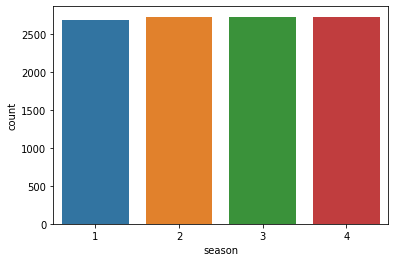

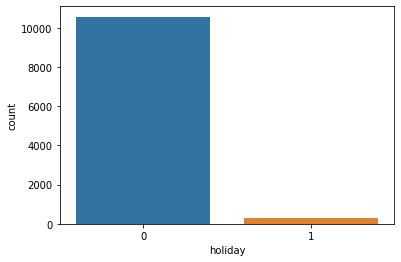

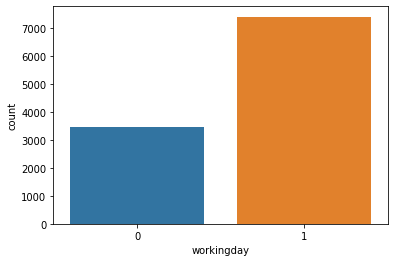

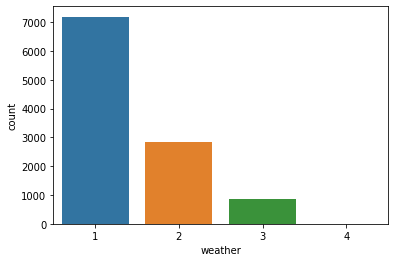

In [ ]:
for i in categorical_columns:
  sns.countplot(yulu_df[i])
  plt.show()

**Season category is having equal amount of instances and this is perfectly useful to apply chisquare test and working day or non holiday is more comapred to non working day and holiday. Among weathers 1 which is of normal is more compared to others**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
yulu_df.groupby(['season'])['count'].count()

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

###c.Bivariate analysis

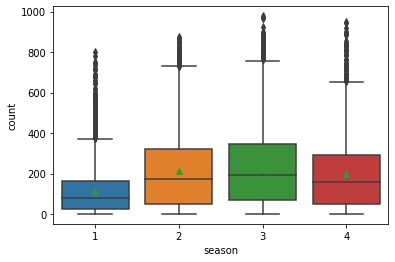

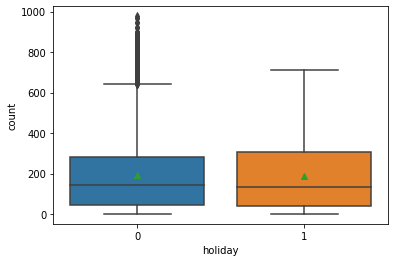

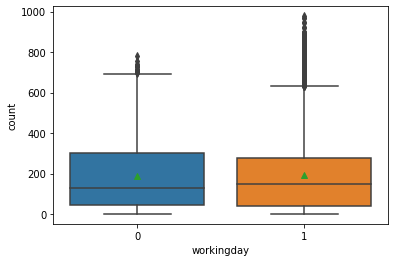

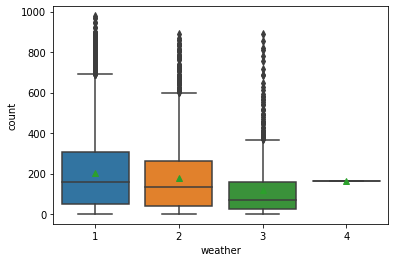

In [ ]:
for i in categorical_columns:
  sns.boxplot(x=i,y='count',data=yulu_df,showmeans=True)
  plt.show()

In [ ]:
yulu_df.groupby(['season'])['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [ ]:
yulu_df.groupby(['weather'])['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

In [ ]:
yulu_df.groupby(['season','weather'])['count'].mean()

season  weather
1       1          126.781694
        2          106.861538
        3           61.227488
        4          164.000000
2       1          236.729595
        2          189.515537
        3          123.906250
        4                 NaN
3       1          243.583420
        2          230.771523
        3          156.582915
        4                 NaN
4       1          209.511163
        2          194.784387
        3          134.466667
        4                 NaN
Name: count, dtype: float64

In [ ]:
yulu_df.groupby(['workingday'])['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [ ]:
yulu_df.groupby(['holiday'])['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

###d.Insights based on EDA

**From the graph it depicts that count of rental bikes is more during weather 1 i.e Clear, Few clouds, partly cloudy**

**Also rental bikes more during 1. fall followed by 2. summer and 3. winter and 4. spring at last**

**The average rental bikes is almost same in categories of holiday and working day**

**From distribution plot of count we can see that majority of rented vehicles falls under 0-20**



##2.Hypothesis Testing

###a.2 sample t-test

We have to check whether working day has any effect or not on cycles rented 

In [ ]:
yulu_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
yulu_df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

**Assumptions**

**If the samples are less than 30 then t-test would be the best to perform rather than z test**

**As of now we have enough data in thousands and n is very large. So t test and z test almost would be the same**

**t- test assumptions**

**1. The populations should have finite mean and finite difference and in this problem the rented cycles and variance obviously be finite**

**2.The 2 samples should be independent and here the working day and non working are independent as the one day is not effecting the other on rented cycles**


The samples n1 and n2 are different so select only 3474 samples of working day and 3474 samples of non working day for better accuracy as n is already large enough

In [ ]:
yulu_df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**So from the above stats it is clear that mean count of cycles rented is 191 and median is 145. But the max rented is 977. It is not an impossible count as in some cases it might happen and hence I consider it as not an outlier**

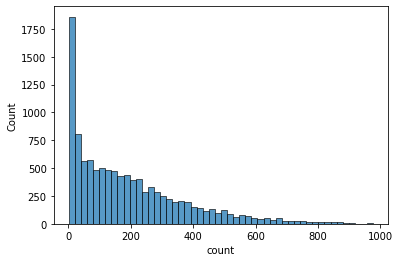

In [ ]:
sns.histplot(yulu_df['count'], bins=50)
plt.show()

In [ ]:
working_day=yulu_df[yulu_df['workingday']==1]['count']
non_working_day=yulu_df[yulu_df['workingday']==0]['count']

In [ ]:
working_day=np.array(working_day)
non_working_day=np.array(non_working_day)

**So here in working day we are actually interested to find out the mean of rented cycles are equal or not on two different days(i.e working or non working). The sample sizes are also different and it varies in thousands and one sample size is 100% more than the other. For better accuracy consider only 3474 samples**

Ho: Rented cycles are equal and has no effect of working day

H1: Rented cycles are not equal and has effect of working day

In [ ]:
working_day_n1=np.random.choice(working_day,3474,replace=True)
working_day_n1

array([209, 633, 729, ...,  73, 173, 135])

In [ ]:
#2 sample T-Test
dof = working_day_n1.shape[0] + non_working_day.shape[0] - 2
dof

6946

In [ ]:
diff_means = working_day_n1.mean() - non_working_day.mean()
diff_means

5.944444444444457

In [ ]:
from scipy import stats

In [ ]:
#2 sample t-test
stats.ttest_ind(working_day_n1, non_working_day)


Ttest_indResult(statistic=1.3922533004245352, pvalue=0.16389027760832556)

**So the test statistic value or p value is greater than the signficant value of 5% so we have to accept null hypothesis  that working day rented cycles == non working day rented cycles**

But while chosing it is random and sometimes the hypotheis depends on selection of data we chose

**Lets calculate with the working day samples of n1-7412 and non working day samples of n2-3474.**

In [ ]:
diff_means = working_day.mean() - non_working_day.mean()
diff_means

4.505252028716285

In [ ]:
stats.ttest_ind(working_day, non_working_day)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

**So the test statistic value or p value is greater than the signficant value of 5% so we have to accept null hypothesis that working day rented cycles == non working day rented cycles**

In [ ]:
yulu_df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
yulu_df.groupby(['workingday'])['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

###b.chisquare test

**It is a non parametric test and there are no conditions particularly w.r.t to mean and standard deviation**

**To check weather is dependent or not with season**

In [ ]:
table=pd.crosstab(index=yulu_df['season'],columns=yulu_df['weather'])
table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


Ho: weather is independent on the season

H1: weather is not independent on the season

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(table, correction=False, lambda_=None)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

**SO, from the above table the p value is very less than significance level and thus we can reject null hypothesis ( which is independent) and have to accept alternate hypothesis. Hence we can say that weather and season are dependent**

In [ ]:
# table=pd.crosstab(index=yulu_df['season'],columns=yulu_df['weather'],values=yulu_df['count'],aggfunc=np.sum)
# table

In [ ]:
# chi2_contingency(table, correction=False, lambda_=None)

###c.Annova

**To check no.of cycles rented is similar or not w.r.t season and weather**

####a.Season

**Assumptions**

**The samples should be drawn from a normal distributed population**

**The group or sample variances must be same**

**All samples drawn are independent of each other**

In [ ]:
yulu_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
sample_1=np.array(yulu_df[yulu_df['season']==1]['count'])
sample_1

array([ 16,  40,  32, ..., 223, 148,  54])

In [ ]:
sample_2=np.array(yulu_df[yulu_df['season']==2]['count'])
sample_2

array([  6,   4,   7, ..., 276, 291, 125])

In [ ]:
sample_3=np.array(yulu_df[yulu_df['season']==3]['count'])
sample_3

array([ 68,  31,  13, ..., 349, 229, 123])

In [ ]:
sample_4=np.array(yulu_df[yulu_df['season']==4]['count'])
sample_4

array([130,  58,  67, ..., 168, 129,  88])

In [ ]:
sample_1.mean(),sample_2.mean(),sample_3.mean(),sample_4.mean()

(116.34326135517499, 215.25137211855105, 234.417124039517, 198.98829553767374)

In [ ]:
sample_1.std(),sample_2.std(),sample_3.std(),sample_4.std()

(125.25065191566085, 191.97271225178454, 197.1149286308142, 177.58992243548823)

**The variances are in the same scale and roughly equal**

In [ ]:
yulu_df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

**The n should be same for all groups or seasons and it is almost same**

**Are the samples are following gaussian distribution?**

In [ ]:
import math

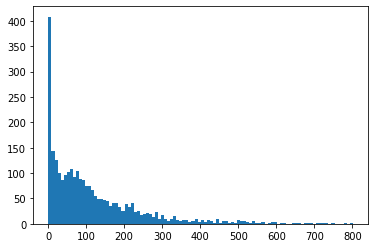

In [ ]:
plt.hist(sample_1,bins=100)
plt.show()

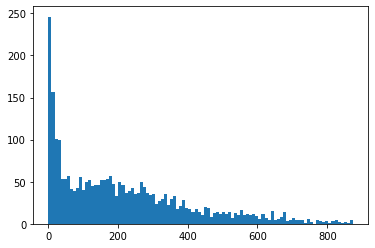

In [ ]:
plt.hist(sample_2,bins=100)
plt.show()

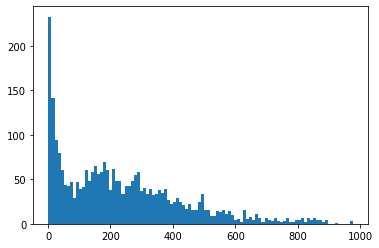

In [ ]:
plt.hist(sample_3,bins=100)
plt.show()

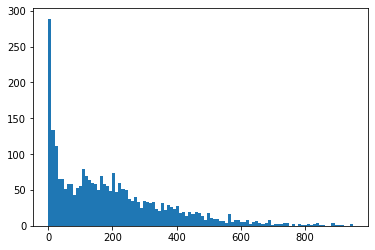

In [ ]:
plt.hist(sample_4,bins=100)
plt.show()

**As it is not following gaussian distribution, please try to apply transformations**

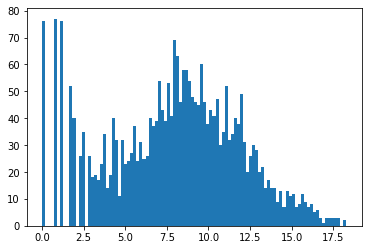

In [ ]:
fitted_data_1, fitted_lambda_1 = stats.boxcox(sample_1)
plt.hist(fitted_data_1,bins=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


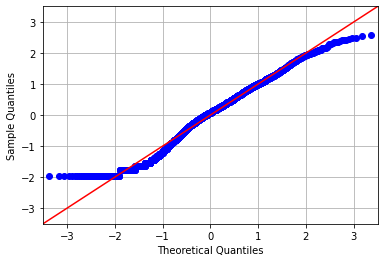

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(fitted_data_1, line='45', fit=True)
plt.grid()

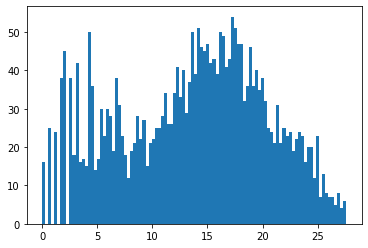

In [ ]:
fitted_data_2, fitted_lambda_2 = stats.boxcox(sample_2)
plt.hist(fitted_data_2,bins=100)
plt.show()

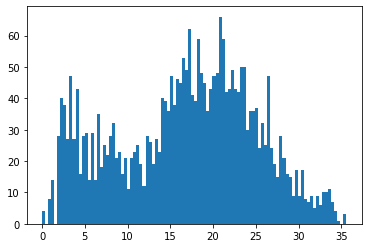

In [ ]:
fitted_data_3, fitted_lambda_3 = stats.boxcox(sample_3)
plt.hist(fitted_data_3,bins=100)
plt.show()

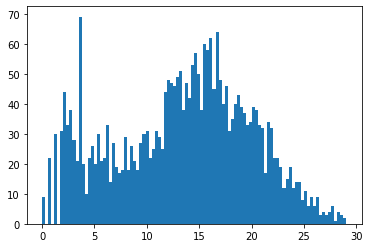

In [ ]:
fitted_data_4, fitted_lambda_4 = stats.boxcox(sample_4)
plt.hist(fitted_data_4,bins=100)
plt.show()

**Even after applying box cox transformation also the non normal is not transformed into normal distribution**

**Actualy , there were no outliers but just eliminate as per IQR and lets try by removing values beyond IQR range**

In [ ]:
yulu_df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
q1=np.percentile(yulu_df['count'],25)
q3=np.percentile(yulu_df['count'],75)
q1,q3

(42.0, 284.0)

In [ ]:
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(-321.0, 647.0)

In [ ]:
yulu_df_new=yulu_df[yulu_df['count']<647]
yulu_df_new

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
yulu_df_new['season'].value_counts()

1    2670
4    2664
2    2633
3    2616
Name: season, dtype: int64

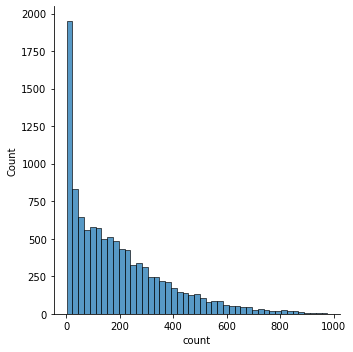

In [ ]:
sns.displot(yulu_df['count'])
plt.show()

In [ ]:
season_unique=yulu_df_new['season'].unique()
season_unique

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
# for i in range(10):
#   name='sample'+str(i)
#   print(f'{name} : {i}')

In [ ]:
# import statsmodels.api as sm
# fig = sm.qqplot(fitted_data_1, line='45', fit=True)
# plt.grid()

season1
Before_transformation


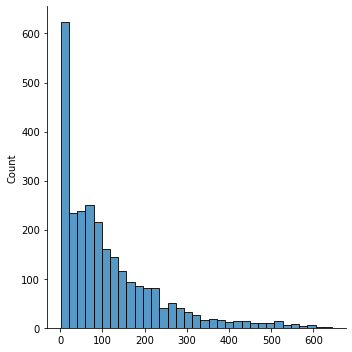

after_transformation


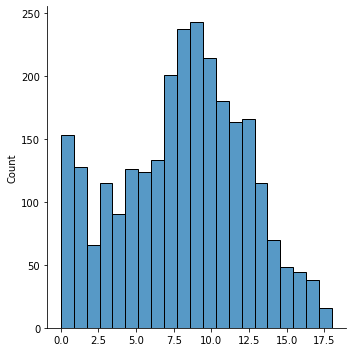

QQplot


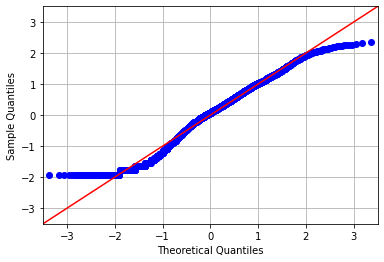

season2
Before_transformation


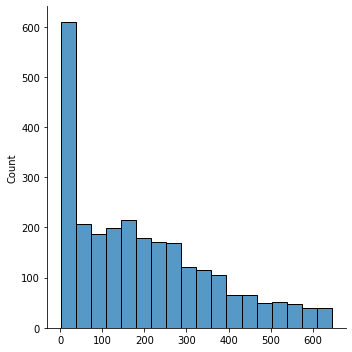

after_transformation


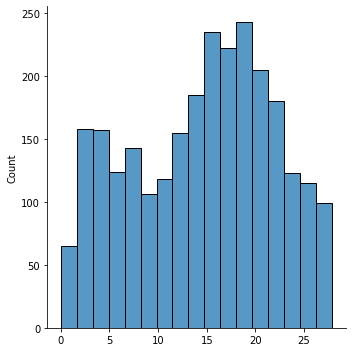

QQplot


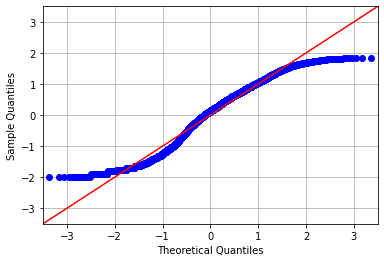

season3
Before_transformation


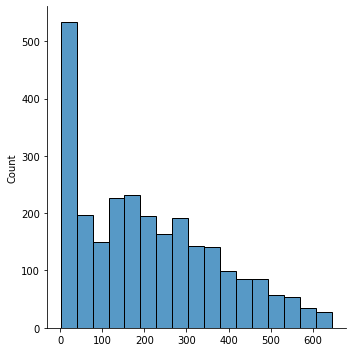

after_transformation


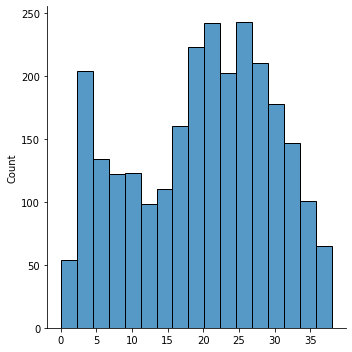

QQplot


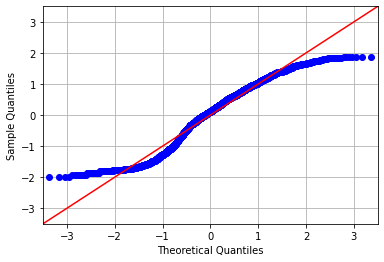

season4
Before_transformation


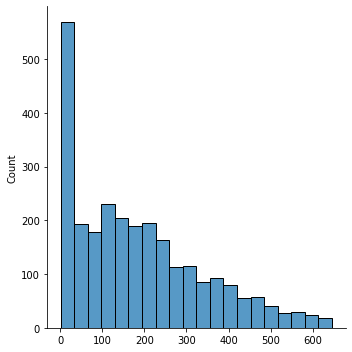

after_transformation


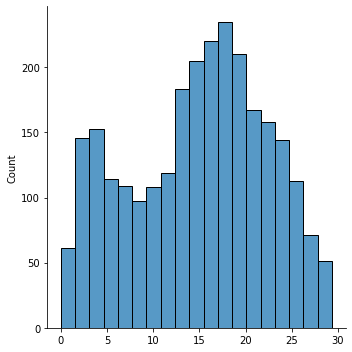

QQplot


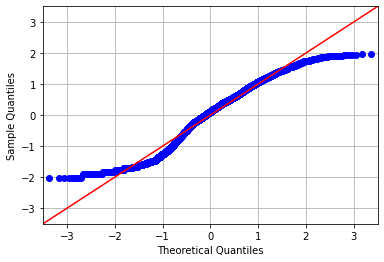

In [ ]:
season_arrays=[]
for i in season_unique:
  sample='season'+str(i)
  array=np.array(yulu_df_new[yulu_df_new['season']==i]['count'])
  print(sample)
  print('Before_transformation')
  sns.displot(array)
  plt.show()
  print('after_transformation')
  fitted_data, fitted_lambda = stats.boxcox(array)
  sns.displot(fitted_data)  
  plt.show()
  print('QQplot')
  fig = sm.qqplot(fitted_data, line='45', fit=True)
  plt.grid()
  plt.show()
  season_arrays.append(fitted_data)


**So after removing outliers also the groups or rented cycles as per season has not changed to normal distribution**

**Actually we have to apply kruskal wallis test, but lets try with annova**

**The third assumption which is of the data should be from normal population, it is failing but still try to apply the annova test**

**Check for annova test or F1 distribution**

**Ho: the means or count is equal for all groups**

**H1: The means or count is not equal for all groups**

In [ ]:
season_arrays

[array([ 4.16855644,  6.41371532,  5.81346355, ..., 12.51543   ,
        10.78631832,  7.28167964]),
 array([ 2.56190598,  1.82204818,  2.87429466, ..., 19.48471852,
        19.93174687, 13.76011755]),
 array([12.50556009,  8.14179193,  4.80192309, ..., 28.37778127,
        23.12453221, 16.97511956]),
 array([14.53096224,  9.91818277, 10.63987482, ..., 16.3272194 ,
        14.47960439, 12.11982531])]

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_oneway(season_arrays[0],season_arrays[1],season_arrays[2],season_arrays[3])

F_onewayResult(statistic=1086.1896839037313, pvalue=0.0)

In [ ]:
f_oneway(sample_1,sample_2,sample_3,sample_4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

**The p value is very less than the significance value and hence we have to reject null hypothesis saying the mean or no.of cycles rented is not equal w.r.t every season**

In [ ]:
stats.kruskal(season_arrays[0],season_arrays[1],season_arrays[2],season_arrays[3])

KruskalResult(statistic=2356.830234505287, pvalue=0.0)

**Even with kruskal wallis test also it is showing p value as 0 means we have to reject null hypothesis i.e count is not equal in all seasons**

####b.Weather

**Assumptions**

**The samples should be drawn from a normal distributed population**

**The group or sample variances must be same**

**All samples drawn are independent of each other**

In [ ]:
yulu_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
sample_1=np.array(yulu_df[yulu_df['weather']==1]['count'])
sample_1

array([ 16,  40,  32, ..., 168, 129,  88])

In [ ]:
sample_2=np.array(yulu_df[yulu_df['weather']==2]['count'])
sample_2

array([  1,  94, 106, ...,  18,  15,   7])

In [ ]:
sample_3=np.array(yulu_df[yulu_df['weather']==3]['count'])
sample_3

array([ 35,  37,   2,   8,  59,  74,  76,   5,   7,   1,  15,  20,  95,
        51,  32,  20,  29,  19,  60,  33,  27,  13,   4,   7,   3,   2,
         3,  22,  52, 135,  16,   2,   3,   4,   1,   1,   3,  18,  49,
       155,   8,   9,   4,   4,  10,  20,  34,  47,  52,  72,  55,  60,
        71,   1,  88,  84,  46,  37,  16,   7,   3,   5,  39,   7,  11,
        25,  23,  11,  11,   7,   4,   2,  21,  18,   3,   2,   1,   3,
        12,  37,  44,  24,  17,  11,  34,  12,  12,  14,  21,  82,  56,
        38,  28,  27,   8,   5,  55,   8,   3,   6,   4,   7,  12,  28,
        95, 184, 190, 136,  79,  15,   2,   5, 157,  46,  28,  19,  13,
         1, 113, 221,  80,  42,  15,  25, 148,  62,  53,  14,   3,  54,
       226,  54,  40, 106, 291, 224,   2,   2,   3,   5,  34,  70, 164,
        95,  10,  45,  29,  22,  31,  58,  63,  78,  33,  15,  53,  24,
       162,  27,   7,   4,   1,   3,   9,  21,  52,  79,  40, 470, 292,
       378, 351,   5,  82, 157, 491, 398, 119,  32,  88, 279, 24

In [ ]:
sample_4=np.array(yulu_df[yulu_df['weather']==4]['count'])
sample_4

array([164])

In [ ]:
sample_1.mean(),sample_2.mean(),sample_3.mean(),sample_4.mean()

(205.23679087875416, 178.95553987297106, 118.84633294528521, 164.0)

In [ ]:
sample_1.std(),sample_2.std(),sample_3.std(),sample_4.std()

(187.94649831022764, 168.33670555002382, 138.5006092451971, 0.0)

**The variances are not even closer and hence we cant apply annova test but as per the instruction given in problem which is to apply even if assumptions are not passed, we are proceeding to apply F distribution and kruskal wallis test**

In [ ]:
yulu_df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

**The n should be same for all groups or seasons but here it is not even closer and the assumptions are failing for this case**

**Are the samples are following gaussian distribution?**

In [ ]:
import math

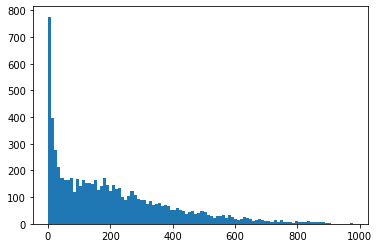

In [ ]:
plt.hist(sample_1,bins=100)
plt.show()

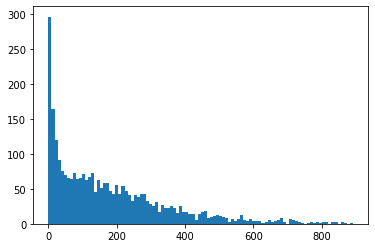

In [ ]:
plt.hist(sample_2,bins=100)
plt.show()

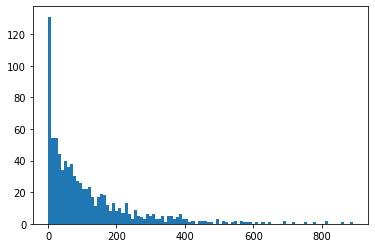

In [ ]:
plt.hist(sample_3,bins=100)
plt.show()

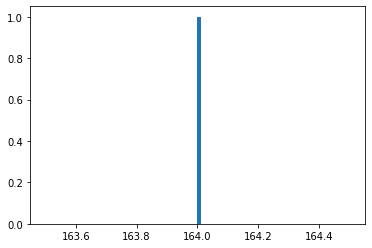

In [ ]:
plt.hist(sample_4,bins=100)
plt.show()

In [ ]:
fitted_data_1, fitted_lambda_1 = stats.boxcox(sample_1)

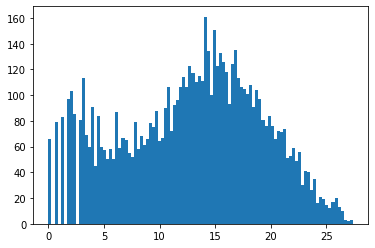

In [ ]:
plt.hist(fitted_data_1,bins=100)
plt.show()

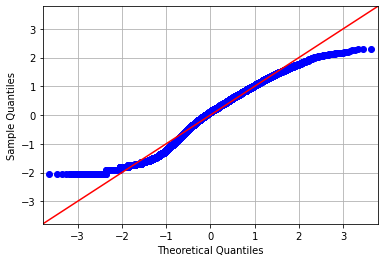

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(fitted_data_1, line='45', fit=True)
plt.grid()

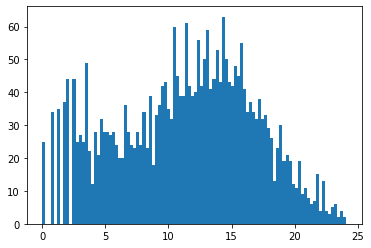

In [ ]:
fitted_data_2, fitted_lambda_2 = stats.boxcox(sample_2)
plt.hist(fitted_data_2,bins=100)
plt.show()

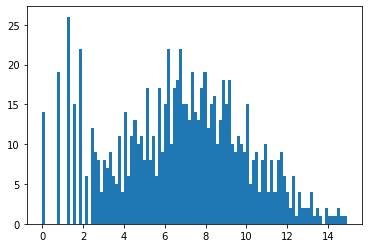

In [ ]:
fitted_data_3, fitted_lambda_3 = stats.boxcox(sample_3)
plt.hist(fitted_data_3,bins=100)
plt.show()

In [ ]:
fitted_data_4, fitted_lambda_4 = stats.boxcox(sample_4)
plt.hist(fitted_data_4,bins=100)
plt.show()

ValueError: ignored

**Even after applying box cox transformation also the non normal is not transformed into normal distribution**

**lets try by removing outliers**

In [ ]:
yulu_df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [ ]:
q1=np.percentile(yulu_df['count'],25)
q3=np.percentile(yulu_df['count'],75)
q1,q3

(42.0, 284.0)

In [ ]:
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(-321.0, 647.0)

In [ ]:
yulu_df_new=yulu_df[yulu_df['count']<647]
yulu_df_new

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
yulu_df_new['weather'].value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

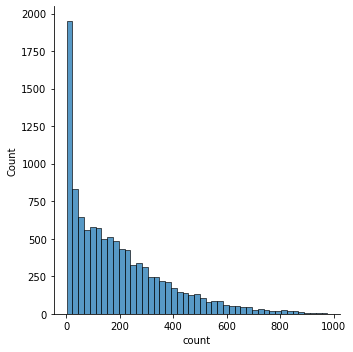

In [ ]:
sns.displot(yulu_df['count'])
plt.show()

In [ ]:
weather_unique=yulu_df_new['weather'].unique()
weather_unique

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
# for i in range(10):
#   name='sample'+str(i)
#   print(f'{name} : {i}')

weaather1
Before_transformation


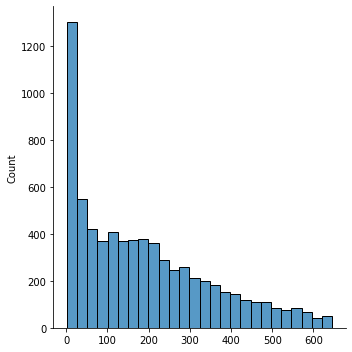

after_transformation


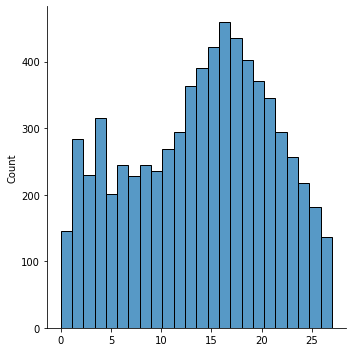

QQplot


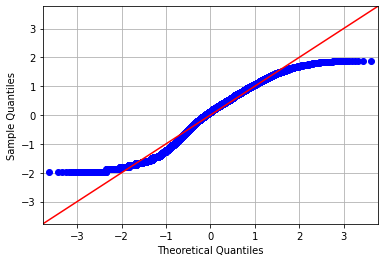

weaather2
Before_transformation


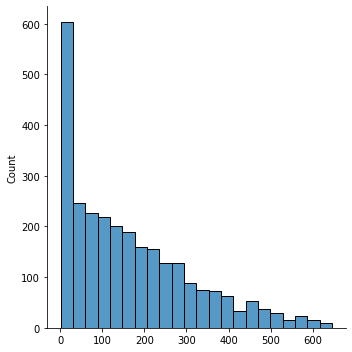

after_transformation


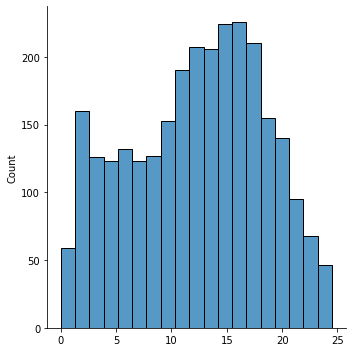

QQplot


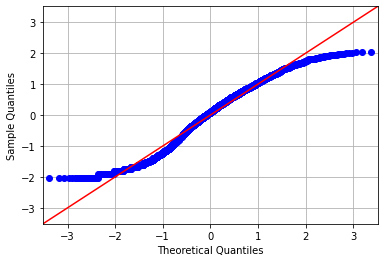

weaather3
Before_transformation


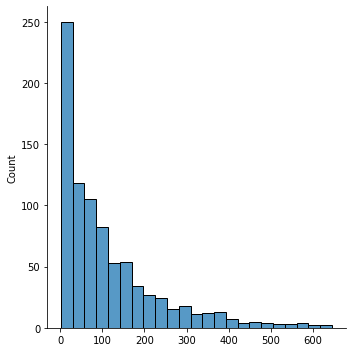

after_transformation


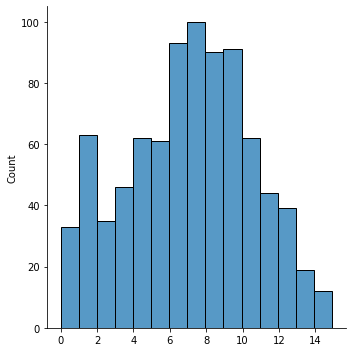

QQplot


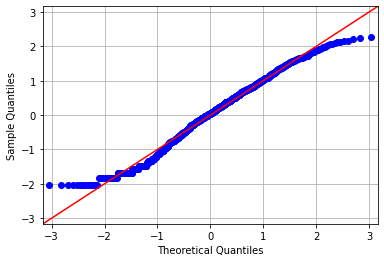

weaather4
Before_transformation


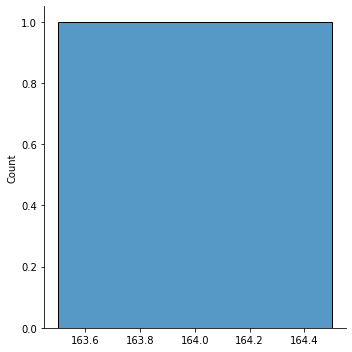

after_transformation


ValueError: ignored

In [ ]:
weather_arrays=[]
for i in weather_unique:
  sample='weaather'+str(i)
  array=np.array(yulu_df_new[yulu_df_new['weather']==i]['count'])
  print(sample)
  print('Before_transformation')
  sns.displot(array)
  plt.show()
  print('after_transformation')
  fitted_data, fitted_lambda = stats.boxcox(array)
  sns.displot(fitted_data)  
  plt.show()
  print('QQplot')
  fig = sm.qqplot(fitted_data, line='45', fit=True)
  plt.grid()
  plt.show()
  weather_arrays.append(fitted_data)


**So after removing outliers also the groups or rented cycles as per weather has not changed to normal distribution**

**Check for annova test or F1 distribution**

In [ ]:
weather_arrays

[array([ 4.84162064,  7.89083019,  7.0502743 , ..., 15.32634399,
        13.64522763, 11.48503273]),
 array([ 0.        , 11.11231936, 11.71035296, ...,  4.98871983,
         4.50484111,  2.78441099]),
 array([ 5.50177676,  5.62848005,  0.75146226,  2.66651677,  6.75879572,
         7.35284235,  7.42483566,  1.947784  ,  2.45435772,  0.        ,
         3.75767476,  4.3121582 ,  8.04485721,  6.39271876,  5.30083571,
         4.3121582 ,  5.08482152,  4.21058784,  6.80181552,  5.36936983,
         4.93104981,  3.49522795,  1.63281707,  2.45435772,  1.24989544,
         0.75146226,  1.24989544,  4.50410218,  6.44079781,  9.08811043,
         3.87889462,  0.75146226,  1.24989544,  1.63281707,  0.        ,
         0.        ,  1.24989544,  4.10481405,  6.29434021,  9.52191577,
         2.66651677,  2.85914057,  1.63281707,  1.63281707,  3.0359267 ,
         4.3121582 ,  5.43632305,  6.19281952,  6.44079781,  7.27933488,
         6.5808871 ,  6.80181552,  7.24199005,  0.        ,  7.82858

In [ ]:
from scipy.stats import f_oneway

**Without considering the weather 4 as it is only 1 sample**

In [ ]:
f_oneway(weather_arrays[0],weather_arrays[1],weather_arrays[2])

F_onewayResult(statistic=436.0754790396411, pvalue=1.0405829846992481e-182)

In [ ]:
f_oneway(sample_1,sample_2,sample_3)

F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)

**The p value is very less than the significance value and hence we have to reject null hypothesis saying the mean or no.of cycles rented is not equal w.r.t every weather**

###d.kruskal wallis test

In [ ]:
sample_1

array([ 16,  40,  32, ..., 168, 129,  88])

In [ ]:
sample_2

array([  1,  94, 106, ...,  18,  15,   7])

In [ ]:
sample_3

array([ 35,  37,   2,   8,  59,  74,  76,   5,   7,   1,  15,  20,  95,
        51,  32,  20,  29,  19,  60,  33,  27,  13,   4,   7,   3,   2,
         3,  22,  52, 135,  16,   2,   3,   4,   1,   1,   3,  18,  49,
       155,   8,   9,   4,   4,  10,  20,  34,  47,  52,  72,  55,  60,
        71,   1,  88,  84,  46,  37,  16,   7,   3,   5,  39,   7,  11,
        25,  23,  11,  11,   7,   4,   2,  21,  18,   3,   2,   1,   3,
        12,  37,  44,  24,  17,  11,  34,  12,  12,  14,  21,  82,  56,
        38,  28,  27,   8,   5,  55,   8,   3,   6,   4,   7,  12,  28,
        95, 184, 190, 136,  79,  15,   2,   5, 157,  46,  28,  19,  13,
         1, 113, 221,  80,  42,  15,  25, 148,  62,  53,  14,   3,  54,
       226,  54,  40, 106, 291, 224,   2,   2,   3,   5,  34,  70, 164,
        95,  10,  45,  29,  22,  31,  58,  63,  78,  33,  15,  53,  24,
       162,  27,   7,   4,   1,   3,   9,  21,  52,  79,  40, 470, 292,
       378, 351,   5,  82, 157, 491, 398, 119,  32,  88, 279, 24

In [ ]:
sample_4

array([164])

In [ ]:
from scipy import stats

In [ ]:
stats.kruskal(sample_1, sample_2,sample_3,sample_4)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

**Even the Kruskal wallis test is also failing and hence we have to reject the null hypothesis saying the no.of cycles rented is equal for all the seasons**

Insights:

I did some EDA followed by statistical tests as per mentioned in the problem statement.
Basically we are analyzing and quantifying our chances of estimation through statistical tests and there by giving some insights whether there is any effect or not on cycles rent w.r.t any of the independent variable.

Through analyzing the data :
1. I found that rented cycles count is same on working day or non working day.
2. There is difference in renting out cycles w.r.t season
3. There is also a difference in renting out cycles w.r.t weather

Recommendations:
1. So w.r.t season and w.r.t weather the cycles renting is different and through visualization it is observed that the mean cycles rent out during season3 is more compared to other and it is more in weather 1 than others.
2. Its better to increase price slightly as there is quite demand and rush during the above hours, they can increase the revenue and at the same time increase the supply of cycles so that they increase the customers.
3. Meanwhile reduce the no. of cycles during harsh weathers.